# Import libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-darkgrid')

## Load two datasets and calculate mean GPA

In [39]:
df_mat = pd.read_csv('student-mat.csv')
df_por = pd.read_csv('student-por.csv')

df_mat['MeanGPA'] = df_mat[['G1', 'G2', 'G3']].values.mean(axis=1)
df_por['MeanGPA'] = df_por[['G1', 'G2', 'G3']].values.mean(axis=1)

df_mat.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,MeanGPA
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333


## Question 1 : Is there any difference in the GPAs of male and female students ?
* You can follow either way listed below :
    - 1. You can present the difference of grades between two genders graphically by comparing their distributions (You can either use KDE plot, histogram or boxplot as discussed in the previous lecture sessions). In this sample answer I will use KDE plot because it is my favourite way of representing distributions.
    - 2. Otherwise, you can do it in a more evident way by conducting an independent t-test on the grades of females and males.

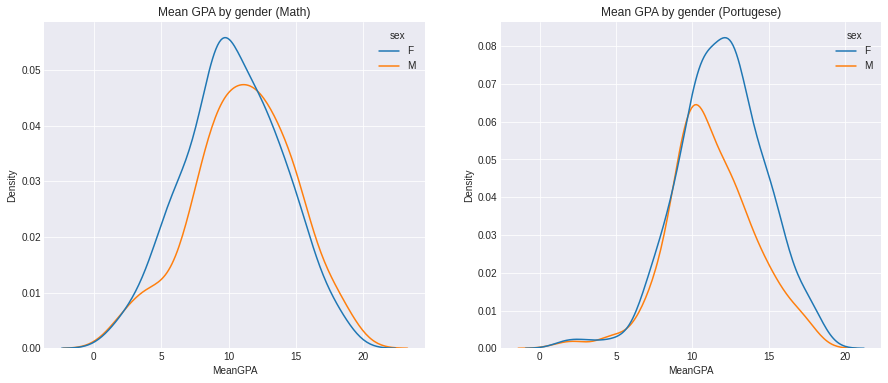

In [40]:
# Method 1 : Visualize the distribution of females and males grades using KDE plot
# 1. Create a figure with 2 subplots (one for Math and one for Portugese grades)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 2. Use seaborn to plot KDE plot
sns.kdeplot(data=df_mat, x='MeanGPA', hue='sex', ax=axes[0])
axes[0].set_title('Mean GPA by gender (Math)')

sns.kdeplot(data=df_por, x='MeanGPA', hue='sex', ax=axes[1])
axes[1].set_title('Mean GPA by gender (Portugese)')
plt.show()

In [41]:
# Method 2 : Conduct statistical testing (independent t-test)
# I performed the independent t-test on math grades, you can easily do the same with Portugese grades
alpha = 0.05 # Significance level
math_f = df_mat[df_mat['sex'] == 'F']['MeanGPA'] # Mean Math GPA of female
math_m = df_mat[df_mat['sex'] == 'M']['MeanGPA'] # Mean Math GPA of male
t_stats, pvalue = stats.ttest_ind(math_f, math_m)

if(pvalue < alpha): # Reject the null hypothesis
    print('There is a difference between the grades of male and female (in Math)')
else:
    print('There is no difference between the grades of male and female (in Math)')

There is a difference between the grades of male and female (in Math)


## Question 2 : How does the score of students living in urban and rural areas differ? Is this difference considerable.
* This question is basically just a reframe of question 1. Instead of conditioning the grades on gender, now you are conditioning it on living area. You can also easily apply independent t-test on this one.

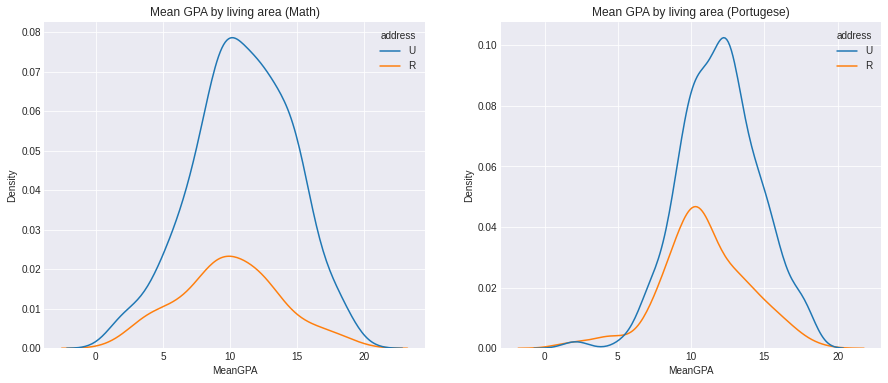

In [42]:
# Method 1 : Visualization. For this case you can already see the difference between the grades of students living
# in urban area and rural area so you might not need to use independent t-test anymore. However I will still do it
# to embed it into your soul just like how this cruel reality did to mine.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 2. Use seaborn to plot KDE plot
sns.kdeplot(data=df_mat, x='MeanGPA', hue='address', ax=axes[0])
axes[0].set_title('Mean GPA by living area (Math)')

sns.kdeplot(data=df_por, x='MeanGPA', hue='address', ax=axes[1])
axes[1].set_title('Mean GPA by living area (Portugese)')
plt.show()

In [43]:
# Method 2 : Independent t-test
alpha = 0.05
math_u = df_mat[df_mat['address'] == 'U']['MeanGPA']
math_r = df_mat[df_mat['address'] == 'R']['MeanGPA']

t_stats, pvalue = stats.ttest_ind(math_u, math_r)

if(pvalue < alpha): # Reject the null hypothesis
    print('There is a difference between the grades of urban and rural students (in Math)')
else:
    print('There is no difference between the grades of urban and rural students (in Math)')

There is a difference between the grades of urban and rural students (in Math)


## Question 3 : Is there a significant correlation between parent's education and students' performance at school.
* For this question you need to look for columns "Fedu" (Father education) and "Medu" (Mother education). I noticed some of you combined these two columns and averaged them to get a "Parents education" column. However, please note that these two columns are CATEGORICAL. So, you must not average or rank or do any numerical-related operations to it even though the categories are indeed numeric. Therefore, do analyze them separately.
* You can either visualize the distributions of grades based on parents education just as how I did for gender and living area. However, for this one I will choose the Pearson coefficient of correlation.

* **Pearson R Explained** : 
    - The coefficient of correlation (R) defines how **_linearly correlated two variables are_**. (Negative R denotes an inproportionate relationship and positive R denotes a proportionate relationship).
    - However, the **reliability** of the correlation may not be assured depending on how many data points you have. Therefore, the pvalue in stats.pearsonr is used to define this reliability. If the pvalue is smaller than the significance level alpha, we say that **our coefficient of correlation significantly differs from zero**.
    - The R-square scores denotes how many percentage of the variance in one variable can be explained by the other variable. For example, correlation between sugar consumption and obesity rate is 0.5 then we say 25% (squared of 0.5) of the obesity rate can be explained by sugar consumption.

In [44]:
# Get correlation of father's education on children's performance
alpha = 0.05
r_fedu, pvalue = stats.pearsonr(df_mat['Fedu'], df_mat['MeanGPA'])

if(pvalue < alpha):
    print(f'Correlation between Father education and grades is {r_fedu} and this correlation is significant')
else:
    print(f'Correlation between Father education and grades is {r_fedu} and this correlation is insignificant')

Correlation between Father education and grades is 0.17585213510215633 and this correlation is significant


## Question 4 : Does extracurricular activities have any impact on the performance of students. If yes, is it a positive or a negative impact?
* There are certainly many ways to analyze this. 
    - 1. Plot the distribution of grades between those who do have extra activities and those who don't
    - 2. Conduct an independent t-test for those who do extra activities and those who don't
    - 3. Find out the pearson correlation between extra activities and students' grades

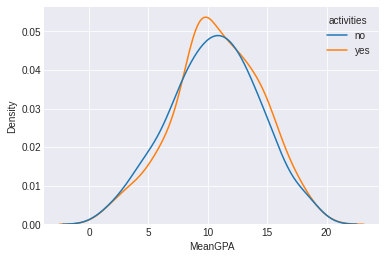

In [45]:
# Method 1 : Visualization 
sns.kdeplot(data=df_mat, x='MeanGPA', hue='activities')
plt.show()

In [46]:
# Method 2 : Independent t-test
alpha = 0.05
math_act = df_mat[df_mat['activities'] == 'yes']['MeanGPA']
math_no_act = df_mat[df_mat['activities'] == 'no']['MeanGPA']
t_stats, pvalue = stats.ttest_ind(math_act, math_no_act)

if(pvalue < alpha):
    print('There is a significant difference between students who do and do not attend extracurriculars')
else:
    print('There is no significant difference between students who do and do not attend extracurriculars')

There is no significant difference between students who do and do not attend extracurriculars


In [47]:
# Method 3 : Pearson correlation

alpha = 0.05

# 1. Encode the categorical column 'activities' to numeric
def encode_categorical(activities):
    if(activities == 'yes'):
        return 1
    else:
        return 0
    
df_mat['activities'] = df_mat['activities'].apply(encode_categorical)

# 2. Calculate the pearson correlation
r, pvalue = stats.pearsonr(df_mat['activities'], df_mat['MeanGPA'])

if(pvalue < alpha):
    print(f'Correlation between extracurriculars and grades is {r} and this correlation is significant')
else:
    print(f'Correlation between extracurriculars and grades is {r} and this correlation is insignificant')

Correlation between extracurriculars and grades is 0.04085861400204222 and this correlation is insignificant


## Question 5 : Does students with active relationship status tend to drink more than those who aren't? 
* Again, multiple ways, plotting distributions based on drinking habit is one but I will introduce how to use anova in this case

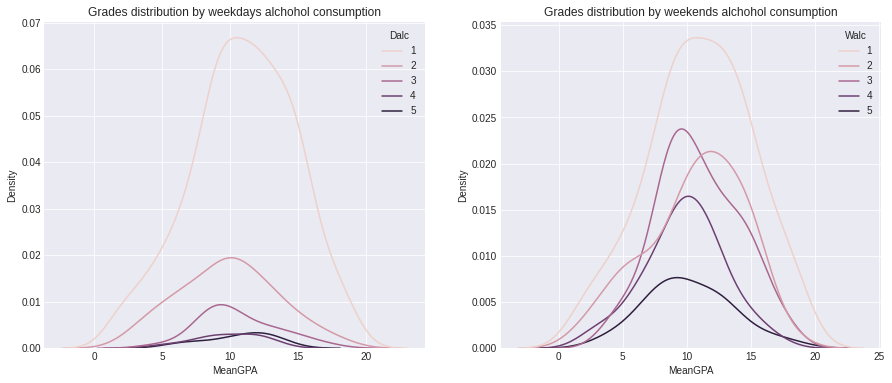

In [52]:
# Method 1 : Visualization. For alchohol consumption, we have "Dalc" and "Walc" for weekdays and weekends.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.kdeplot(data=df_mat, x='MeanGPA', hue='Dalc', ax=axes[0])
sns.kdeplot(data=df_mat, x='MeanGPA', hue='Walc', ax=axes[1])

axes[0].set_title('Grades distribution by weekdays alchohol consumption')
axes[1].set_title('Grades distribution by weekends alchohol consumption')

plt.show()

In [56]:
# Method 2 : One way ANOVA. I will do one example on weekdays alchohol consumption, you guys to the other one
alpha = 0.05
samples = []

for alc in df_mat['Dalc'].unique():
    samples.append(df_mat[df_mat['Dalc'] == alc]['MeanGPA'])
    
t_stats, pvalue = stats.f_oneway(*samples)

if(pvalue < alpha):
    print('Weekday consumption of alchohol does affect students grades')
else:
    print('Weekday consumption of alchohol does not affect students grades')

Weekday consumption of alchohol does not affect students grades


## Question 6 : Analyze the effect of family relationship status on the use of alchohol in students.
 * You can also solve question 6 like how question 5 is solved :
     - Visualizing distributions of grades based on family relationship.
     - Conducting one-way ANOVA

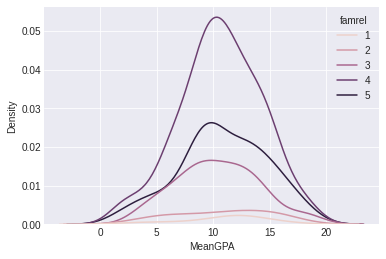

In [59]:
# Method 1 : Visualization
sns.kdeplot(data=df_mat, x='MeanGPA', hue='famrel')
plt.show()

In [60]:
# Method 2 : Oneway ANOVA - Do your practice here. You saw how I do it -_-

## Question 7 : Analyze the difference between the students who opt for higher education and those who do not.
 * Since this is an open-ended question, there are multiple things that you can analyze. I will list a few for your reference :

### 1. What is the mean GPA of those who opt for higher education and those who do not?
* The following bar plot shows that the GPA of those going for higher education generally perform better than those who do not

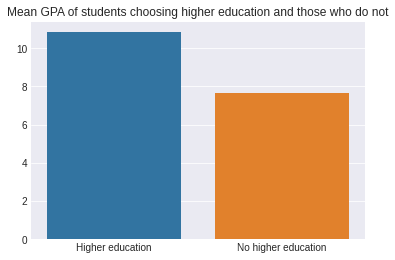

In [66]:
mean_higher = df_mat[df_mat['higher'] == 'yes'].mean()['MeanGPA']
mean_no_higher = df_mat[df_mat['higher'] == 'no'].mean()['MeanGPA']

fig, ax = plt.subplots()
sns.barplot(x=['Higher education', 'No higher education'], y=[mean_higher, mean_no_higher], ax=ax)
ax.set_title('Mean GPA of students choosing higher education and those who do not')

plt.show()

### 2. Weekdays alchohol consumptions by future plan?
 * Surprisingly those who opt for higher education (aka seemingly model students) drink more consistently than those who do not opt for higher education.

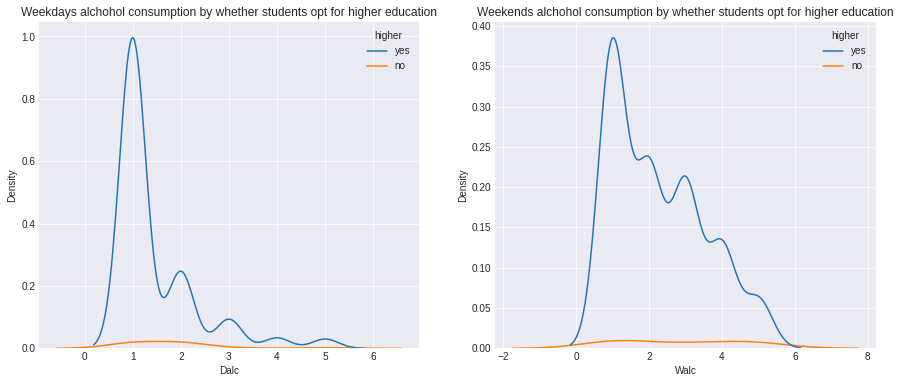

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.kdeplot(data=df_mat, x='Dalc', hue='higher', ax=axes[0])
sns.kdeplot(data=df_mat, x='Walc', hue='higher', ax=axes[1])

axes[0].set_title('Weekdays alchohol consumption by whether students opt for higher education')
axes[1].set_title('Weekends alchohol consumption by whether students opt for higher education')
plt.show()

### 3. Quality of family relationship ?

<AxesSubplot:xlabel='famrel', ylabel='Density'>

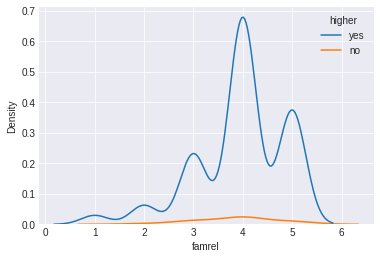

In [70]:
sns.kdeplot(data=df_mat, x='famrel', hue='higher')
plt.show()